# **Simple Radiation Therapy:**

Problem Source: F. S. Hillier and G. J. Lieberman, "Introduction to Mathematical Programming," 2nd Edition, McGraw-Hill Inc., New York, 1995.

**Problem Statement:**

MARY has just been diagnosed as having a cancer at a fairly advanced stage. Specifically, she has a large malignant tumor in the bladder area (a "whole bladder lesion").

Mary is to receive the most advanced medical care available to give her every
possible chance for survival. This care will include extensive radiation therapy.

Radiation therapy involves using an external beam treatment machine to pass
ionizing radiation through the patient's body, damaging both cancerous and healthy tissues. Normally, several beams are precisely administered from different angles in a two-dimensional plane. Due to attenuation, each beam delivers more radiation to the tissue near the entry point than to the tissue near the exit point. Scatter also causes some delivery of radiation to tissue outside the direct path of the beam. Because tumor cells are typically microscopically interspersed among healthy cells, the radiation dosage throughout the tumor region must be large enough to kill the malignant cells, which are slightly more radiosensitive, yet small enough to spare the healthy cells. At the same time, the aggregate dose to critical tissues must not exceed established tolerance levels, in order to prevent complications that can be more serious than the disease itself. For the same reason, the total dose to the entire healthy anatomy must be minimized.

Because of the need to carefully balance all these factors, the design of radiation therapy is a very delicate process. The goal of the design is to select the combination of beams to be used, and the intensity of each one, to generate the best possible dose distribution. (The dose strength at any point in the body is measured in units called kilo rads.) Once the treatment design has been developed, it is administered in many installments, spread over several weeks.

In Mary's case, the size and location of her tumor make the design of her treatment an even more delicate process than usual. Figure 3.11 shows a diagram of a cross section of the tumor viewed from above, as well as nearby critical tissues to avoid. These tissues include critical organs (e.g., the rectum) as well as bony structures (e.g., the femurs and pelvis) that will attenuate the radiation. Also shown are the entry point and direction for the only two beams that can be used with any modicum of safety in this case. (Actually, we are simplifying the example at this point, because normally dozens of possible beams must be considered.)

For any proposed beam of given intensity, the analysis of what the resulting radiation absorption by various parts of the body would be requires a complicated process. In brief, based on careful anatomical analysis, the energy distribution within the two-dimensional cross section of the tissue can be plotted on an isodose map, where the contour lines represent the dose strength as a percentage of the dose strength at the entry point. A fine grid then is placed over the isodose map. By summing the radiation absorbed in the squares containing each type of tissue, the average dose that is absorbed by the tumor, healthy anatomy, and critical tissues can be calculated. With more than one beam (administered sequentially), the radiation absorption is additive.

After thorough analysis of this type, the medical team has carefully estimated the data needed to design Mary's treatment, as summarized in Table 3.7. The first column lists the areas of the body that must be considered, and then the next two columns give the fraction of the radiation dose at the entry point for each beam that is absorbed by the respective areas on average. For example, if the dose level at the entry point for beam 1 is I kilorad, then an average of 0.4 kilorad will be absorbed by the entire healthy anatomy in the two-dimensional plane, an average of 0.3 kilorad will be absorbed by nearby critical tissues, an average of 0.5 kilorad will be absorbed by the various parts of the tumor, and 0.6 kilorad will be absorbed by the center of the tumor. The last column gives the restrictions on the total dosage from both beams that is absorbed on average by the respective areas of the body. In particular, the average dosage absorption for the healthy anatomy must be as small as possible, the critical tissues must not exceed 2.7 kilorads, the average over the entire tumor must equal 6 kilorads, and the center of the tumor must be at least 6 kilorads.

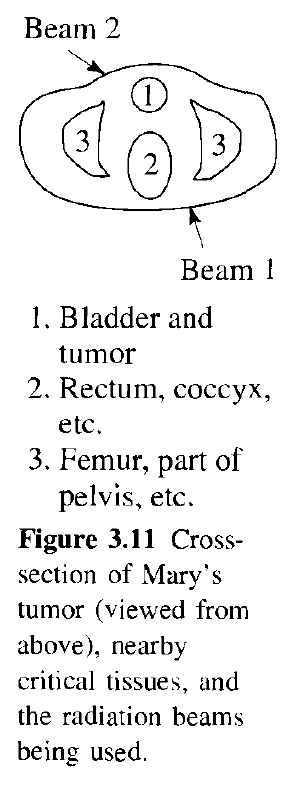

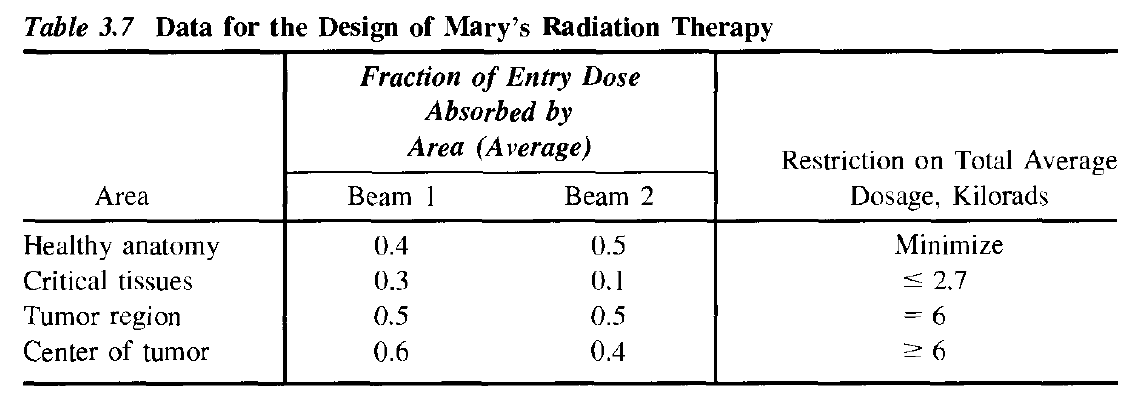

**General Modeling:**

$x_1$ and $x_2$ represent the dose (in kilorads) at the entry point for beam $1$ and beam $2$, respectively.

$\\ $

$Objective\ Function:\\ $

$Max Z = 0.4 x_1+0.5 x_2$

$\\ $

$Constraints:\\ $

$0.3 x_1 + 0.1 x_2 \leq 2.7$

$0.5 x_1 + 0.5 x_2 = 6$

$0.6 x_1 + 0.4 x_2 \geq 6$

$x_1, x_2 \geq 0$

In [1]:
!pip install pulp
from pulp import *
import numpy as np
import pandas as pd

In [2]:
#Defining Variables

x1 = LpVariable('x1', lowBound=0, cat='Continuous')
x2 = LpVariable('x2', lowBound=0, cat='Continuous')

In [3]:
#Defining Objective Function

z = LpProblem('z', LpMinimize)
z +=  0.4*x1 + 0.5*x2

In [4]:
#Constraints

z += 0.3*x1 + 0.1*x2 <= 2.7
z += 0.5*x1 + 0.5*x2 == 6
z += 0.6*x1 + 0.4*x2 >= 6

In [5]:
#Model summary

z

z:
MINIMIZE
0.4*x1 + 0.5*x2 + 0.0
SUBJECT TO
_C1: 0.3 x1 + 0.1 x2 <= 2.7

_C2: 0.5 x1 + 0.5 x2 = 6

_C3: 0.6 x1 + 0.4 x2 >= 6

VARIABLES
x1 Continuous
x2 Continuous

In [6]:
#Solving model

z.solve()
print('Optimal Solution:', pulp.value(z.objective))

Optimal Solution: 5.25


In [7]:
for variables in z.variables():
  print(f'{variables.name}:{variables.varValue}')

x1:7.5
x2:4.5


In [8]:
print('Current Status: ', LpStatus[z.status])

Current Status:  Optimal


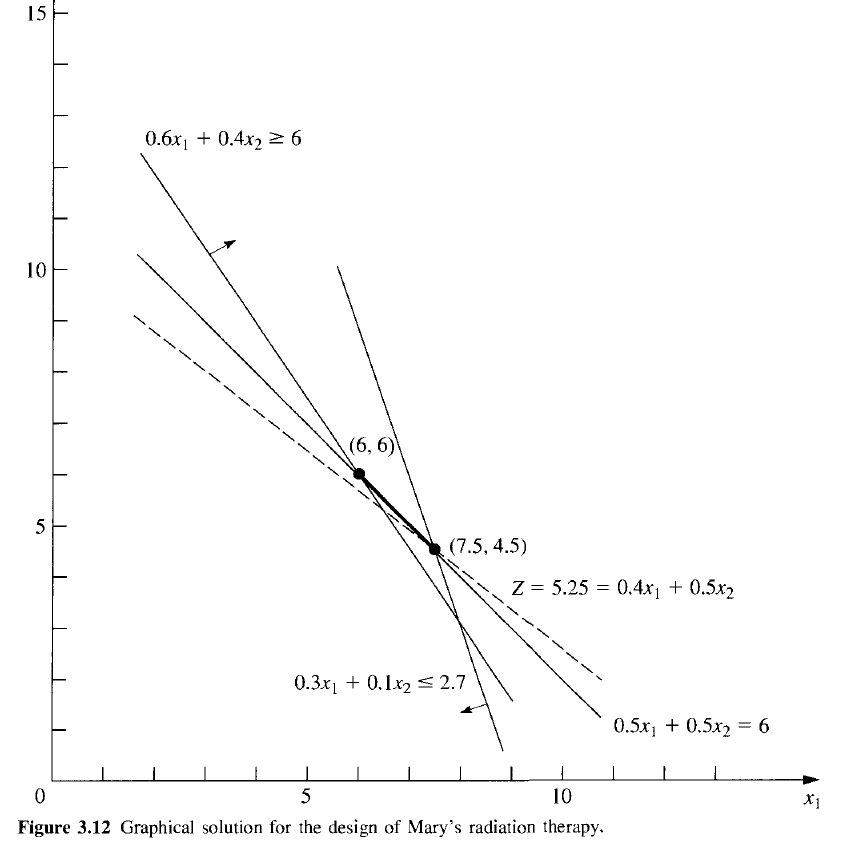

This problem has multiple optimal solutions. However, you can only see one of them with pulp.